# $\textbf{statistical analysis of saturation of SiPM}$

- expected number of photons detected including causes of saturation

In [1]:
import numpy as np
import numpy.random as rd
import scipy.interpolate as ip
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import binom, poisson, gamma, expon # poissson distribution,gamma distribution,exponential distribution
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal
import math
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

### references
<span id="id_01"> [1] https://www-he.scphys.kyoto-u.ac.jp/theses/master/gomi_mt.pdf</span>

<span id="id_02"> [2] https://indico.gsi.de/event/6990/contributions/31524/attachments/22689/28454/Vinogradov_-_Noise_-_ICASiPM_2018.pdf </span>

<span id="id_03"> [3] https://indico.cern.ch/event/297045/contributions/1658341/attachments/557290/767839/Vinogradov_-_SiPM_in_BLM_-_oPAC_2014_.pdf</span>

<span id="id_04"> [4] https://arxiv.org/abs/1511.06528 </span>

<span id="id_05"> [5] https://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=5F2C9F0A23FBE191232F1C6AE56279D4?doi=10.1.1.43.4186&rep=rep1&type=pdf </span>

<span id="id_06"> [6] Rosado, J. (2019). Modeling the Nonlinear Response of Silicon Photomultipliers. IEEE Sensors Journal, 19, 12031-12039.
https://arxiv.org/abs/1905.06032 </span>

<span id="id_07">[7]https://www.mathpages.com/home/kmath199.htm</span>

<span id="id_08">[8] https://www.sciencedirect.com/science/article/pii/S0168900206008680?via%3Dihub</span>

<span id="id_09">[9]https://arxiv.org/pdf/1904.05977.pdf</span>

<span id="id_10">[10]http://ndip.in2p3.fr/ndip14/AGENDA/AGENDA-by-DAY/Presentations/3Wednesday/PM/ID34615_Rosado.pdf</span>

# statement:
- Study of probability distribution for saturation of SiPM 

This study is expected to see:
- probability density function of each cause of saturation 
- different approaches to find probability by investigating states of each pixel (Maximum likelihood vs MCMC)

# introduction


The inconsistancy of the injected and detected photons is considered as the result of saturation of SiPM which is defined as unavailability of pixels to detect precise number of photons due to the limited number of pixels, recovery time of a pixel and noise. When a large number of photons $N_{seed}$ compared to the number of pixels $N_{pix}$ is injected, intuitively it is easy to imagine multiple injected photons are more likely to enter 1 pixel. In the process of photon detection by SiPM, this phenomenon occurs when  $N_{seed}$ gets closer to $N_{pix}$, and also because a pixel is unable to count the exact number of photons entered, the resultant avalanches from one pixel thus are a response to whether a photon entered or not, the number of detected photons $N_{det}$ is less than $N_{seed}$ as it can be seen nonlinearity of from figure 1. 

The recovery time is the time duration a pixel requires to return to the original state after the pixel detects photon. Suppose a photon enters a pixel that have been experienced giger discharge, then the pixel returns the amount of charges fewer than the orginal state of the pixel. The creation of avalanches with few charges is not only because of later injection of photons but also due to secondary photons that are created by avalanches. The secondary photons are absorbed in the deplation ragion and affects either a pixel a secondary photon originates from, or neibhouring pixels. The phenomena are called afterpulse and crosstalk respectively. Depending on the time when the secondary photon is released and which pixel it hits, these two phenomena are distinguished. [<sup>1</sup>](#id_01)

The total response of SiPM is described by a series of stochastic processes. This is because photon detection by SiPM is a time-dependent event and the output number of photons doesn't return the same number of photons as seeded so that there must be phenomena that cause a lack of counting in the process of counting photons. 

Besides, the data obtained by the experiment only indicates macroscopic quantities such as the relationship between $N_{seed}$ and $N_{det}$. However, causes of the saturation such as afterpulse, crosstalk and multiple photon injection occur in units of pixels, hence the model with the state of each pixel at arbitrary time is required in order to investigate precise effect of the saturation to the inconsistancy of input and output. It is impossible to obtain exact microscopic data, generate probabilitistic model that how likely causes of non-linearlity is essential. Overall, because the whole process of detecting photons has consisted of several microscopic processes and there must be distinct probabilistic models corresponding to each step, it requires exploring the process of detection step by step with causes of the saturation. In this study, the response is treated as a random variable and aim to yield the overall probabilities of causes of the saturation.

notes:
- Avalanches are the superposition of signals from all pixels, the number of detected photons per pixel is not displayed and we have no clue for states of each pixel during recovery. 

parameter: [420.63745537  51.81041333   3.91382777]


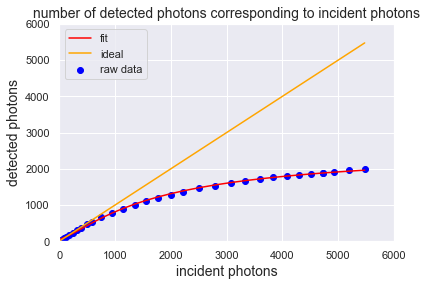

In [2]:
#data file for figure 1
import csv
data1 = []
with open("data.txt") as data: 
    reader = data.readlines()
    
for i in reader:
    word = i.split()
    data1.append(word)

for i in range(len(data1)):
    for j in range(3):
        data1[i][j] = float(data1[i][j])
        
data1 = np.array(data1)
detected_data = np.zeros(36)
incident_data = np.zeros(36)

for i in range(len(detected_data)):
    detected_data[i] = data1[i][2]
    incident_data[i] = data1[i][1]

def nonlinear_fit(x,a,b,c):
    return  b * np.exp(c*(x / (a+x)))

param_initial = np.array([1,1,1])
param, cov = curve_fit(nonlinear_fit, incident_data, detected_data, p0= param_initial)
print ("parameter:", param)

y = nonlinear_fit(incident_data, *param) #fitting

sns.set()
plt.scatter(incident_data, detected_data, c='blue', label='raw data')
plt.plot(incident_data, y, 'r-', c='red',label='fit')
#plt.text(3000,2500,r"$f(x) = 51.81e^{(\frac{3.91x}{420.64+x})}$",fontsize=15)
plt.plot(incident_data, incident_data, c='orange', label='ideal')

plt.xlabel('incident photons', fontsize=14)     # xlabel
plt.ylabel('detected photons', fontsize=14)     # ylabel
plt.title("number of detected photons corresponding to incident photons",fontsize=14)
plt.ylim(0, 6000)
plt.xlim(0, 6000)
plt.grid(True)
plt.legend() #legend
#plt.show()
plt.savefig("optimize_data1.png")  


$\textbf{Figure 1}$: Example graph of saturation; the number of detected photons corresponding to different number of incident photons is non-linear and the cause is considered as saturation (the data is obtained by the experiment)


The distribution of inject photons is analogous to classic ball and urn problem[<sup>7</sup>](#id_07) and Binomial distribution is the most popular way to discribe this kind of problem. In previous research, the expected number of pixels which contain at least 1 photon is expressed as [<sup>4</sup>](#id_04) 
$$ N_{fired} = N_{pix}(1-e^{-\frac{N_{seed}}{N_{pix}}}) \label{a} \tag{1}$$

Although $\ref{a}$ shows nonlinearlity of SiPM response at the time when photons are injected, it can't be approximated as the number of detected photons since the detection depends on charges released due to crosstalk and afterpulse as well as guiger discharge by a pixel. The overestimation in probability results the expected number of overall output charge be larger. Hence, the model is valid if and only if no pixel interfers other pixels and no photon lands within deplation region
therefore crosstalk and afterpulse are not taken into account. [<sup>8</sup>](#id_08) 


In [3]:

#known variables
#pulse
#
pulse = np.linspace(0, 0.8, 1000) #pulse width; ns; 1000分割



rt = 10 # recovery time; ns
#this is just an assumption; any rt value >> pulse width is accepted


n_pix = 4489 #number of pixels (active)
mult_rate = 2.3e5  #増倍率
n_s = np.arange(0, 3001, 1) #number of seeded photons; assume 1000 photons at maximum thrown in

parameter: [664.73510319   4.59752004]


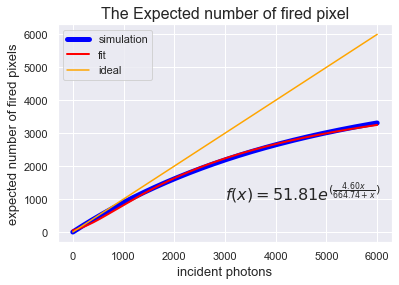

In [4]:
#expected number of fired pixel is non-lienar for equation by D.Jeans 
incident_sim = np.arange(0, 6000, 1)
n_fire = n_pix*(1-np.exp(-incident_sim/n_pix))


def nonlinear_fit(x,a,c):
    return  51.81041333* np.exp(c*(x / (a+x)))

param_initial = np.array([1,1])
param, cov = curve_fit(nonlinear_fit, incident_sim, n_fire, p0= param_initial)
print ("parameter:", param)
y = nonlinear_fit(incident_sim, *param)

sns.set()
plt.plot(incident_sim, n_fire, c='blue', linewidth=5, label='simulation')
plt.plot(incident_sim, y, 'r-', c='red',linewidth=2,label='fit')
plt.plot(incident_sim, incident_sim, c='orange', label='ideal')
plt.text(3000,1000,r"$f(x) = 51.81e^{(\frac{4.60x}{664.74+x})}$",fontsize=16)
plt.title("The Expected number of fired pixel",fontsize = 16)
plt.xlabel('incident photons', fontsize = 13)
plt.ylabel('expected number of fired pixels', fontsize = 13)
plt.legend()
plt.savefig("optimize_sim.png")  

$\textbf{Figure 2}$: The expected number of pixel; compared to figure 1, it can be seen that it is overestimation suppose it can be approximated number of expected number of detected photons.



Both figure 1 and figure 2 are fitted by $$f(x) = Ae^{B(\frac{x}{C+x})}$$ where A = 51.81, B and C are real cofficients. a cofficient A is an empirical number derived from the data for figure 1 and used for simulation graphs so that not only does it make us easy to focus on difference in growth of $N_{det}$ against the same range of $N_{seed}$, but also we can see a reason why other causes of the saturation has to be considered.

As $x = N_{seed}$ approaches to infinity, $f(x)$ of the simulation (figure 2) grows much faster and larger than that of the experiment, it can be seen by comparing the cofficient B. Therefore the model for the expected number of fired pixel is failed to approximate as the number of detected photons, it strengthens contributions of other causes. Although the previous research uses only probability of distribution of injected photons for generating output charge model, other factors have strong correlation with $N_{det}$ hence the expected output charge should be lower than that in the research.


Impinging photon produces carriers which are resultant of photoelectric effect, it triggers an avalanche in the pixel. The probability of such carriers production is given by intrinsic property of SiPM called photondetection efficiency $\varepsilon$ (PDE) [<sup>7</sup>](#id_07). proability arised from proprety of SiPM as well as PDE called avalanche triggering probability. It tells us how likely carriers from the pixel yeild avalanches. The probability and PDE are dependent of reverse bias voltage applied to SiPM and recovery time of a pixel [<sup>8</sup>](#id_08).
- PDE: $$\epsilon_{rec}(t) = \epsilon_{max}(1-exp(-\frac{u(t)-U_0}{U_{ch}})) $$
- overvoltage:$$u(t) = U(1-exp(\frac{t}{t_{rec}})) $$

$t_s$ is the time difference between the recovery time of when the secondary photon associated with crosstalk and Afterpulse is released from an arbitrary pixel is key factor as the recovery time of the pixel detecting the secondary photon shifts by $t_s$ and the charge generated by the photon is $$q(t_s) = q_{max}(1-e^{-\frac{t_s}{\tau_{rec}}})$$

mean pulse created by afterpulse that associated secndary photons are induced by primary and ensuing avalanches is more likely to be lower amplitude than the pulse released by a pixel in original state because of recovery time.


therefore, the process of photon detection and the probabilities required to consider is following[<sup>2</sup>](#id_02);
1. injecting photon => distribution of photons
    - probablity of multiple photons in the same pixel (binomial)
2. photoelectron
    - probability of producing photoelectron (PDE)
3. primary avalanches
    - probability of  generating avalanches due to carriers
4. Crosstalk and afterpulse corresponding to 3.
5. all ensuing avalanches
(- correlates induced noise, but ignore it for simplicity)
6. Crosstalk and afterpulse corresponding to 5.
7. multiplication

combining 1~7., it has to generate probability of the cause of saturation

notes:[<sup>7</sup>](#id_07)
- the mean output charge of the siPM  = q in absence of noise
- the instantaneous overvoltage u(t) of the pixel triggering an avalanche  drops zero and grows exponentially (4)
- supplied overvoltage U
- t = delay time from the avalanche triggering
- lacking DCR and multiple photon in one pixel

=======
- the factor associated with generaton of CT is
- Afterpulse depends on 

# Model

# Approach 1

### characteristics  (25ºC)
- pulse width $\tau_{pulse}= 0.8$ (ns) 
- recovery time (few tens of ns) $\tau_{rec}= 8.5$ (ns) 
- number of pixels $N_{pixel}  = 4489$
- pixel pitch: 15 $\mu m$
- PDE $25$ %
- $V_{br} = 65$V
- operating voltage (recommended): $V_{br} +4.0$
- wavelength: 460 nm
データ from: https://www.hamamatsu.com/resources/pdf/ssd/s12571-010_etc_kapd1044e.pdf



non-linearity analysis by rosando: https://arxiv.org/pdf/1905.06032.pdf

辻さんのスライド:https://pdfs.semanticscholar.org/d8e2/b567fee08f27e3a3a90a6838267fb9ebaf91.pdf

### indepdent variable (per pixel) :
- multiple photons enter the same pixel, but after a while it could enter the pixel that already has a photon.
- photoelectrons
- avalanches by charges
- afterpulse, crosstalk

### dependent variable:
- corresponding probability distributions

### instrament:
- all variables are based on SiPM (MPPC; S12571-015P)

 

## assumption
- no dead region
- single channel

longer pulse width is expected to produce more intense non-linear graph because time duration from beggining of the irradiation is increased and there is more chance for seeded photons to enter the SiPM. However, if the pulse width is shorter than the recovery time, then a pixel would be recovered and return to an original state after pulse width ends and no more photons entered.

Suppose the amount of charges corresponding to primary avalanche is $q_0$, charges for following avalanches q must be less than $q_0$ and dependent of recovery time. 

## maximum likelihood estimation

$$
L(\theta|D) = \prod\limits_{i=1}^{N} f(x_i|\theta) \label{c}\tag{1}
$$
Probability distribution is determined by pararmeters; for instance, poisson distribution requires only $\lambda$ which represents mean and variance while normal distribution has distinct mean and variance therefore it requires two variables. Maximum likelihood estimation $(\ref{c})$ shows which value the parameter $\theta$ is the most likely to be when an observed sample dataset D is true. Since observed data is macroscopic (i.e. number of input and output obtained for whole SiPM), the data should be manipulated and converted into each pixel states. 


The equation $(\ref{c})$ can be interpreted as products of the function for each pixel. Assume states of each pixel are independent of the position of the pixel and also pixels are identical and mutually independent, L can be simplified as

$$
L(\theta|D) = \prod\limits_{i=1}^{N} f(x_i|\theta) = N_{pix}f(x|\theta) \label{d}\tag{2}
$$

Hence, the function $f(x_i|\theta)$ for each pixel is 


$$
f(x|\theta) = \frac{1}{N_{pix}}L(\theta|D) \label{e}\tag{3}
$$

From the function, it is able to determine the parameter for the distribution of each pixel based on the probability distribution of whole SiPM.

- characteristics of the probability distribution for hypothetical microscopic dataset is $\frac{\theta}{N_{pix}}$ 


#### probability that n photons entered the pixel per unit time 

- pobability that n photons enter by time t:
$P_n(t) = \frac{(\lambda t)^n}{n!}e^{-\lambda t} $

- pobability that n photons enter per unit time:
$P_n(1) = \frac{(\lambda)^n}{n!}e^{-\lambda}$

where $\lambda$ is the mean of photon entered 1 pixel per unit time

By MLE, the mean $\lambda = \frac{N_{seed}}{N_{pix}}$, assume all injected photons by LED enter one of pixels. 




In [5]:
data_rv = np.zeros((max(n_s)+1)*n_pix).reshape((max(n_s)+1),n_pix)
rd.seed(12)
for i in range(len(n_s)):
    data_rv[i] = rd.poisson(n_s[i]/n_pix, size = n_pix) #l (avg # photon per pixel within t_pulse) = 1 
    #n_s[i]/n_pix is approximately 1
data_rv
#trial = np.arange(1,1000)
#fig, ax = plt.subplots(figsize=(9, 6))
#ax.hist(data_rv[max(n_s)], rwidth=0.6, color="blue")
#ax.set_xlabel("number of photons")
#ax.set_ylabel("probability")
#plt.show()
#mean probability that 1 photon enters 1 pixel at (max(pulse)/100)ns
#plt.plot(pulse, y2, color="blue",label="2 photons")

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [2., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.]])

#### probability that s carriers are produced by photon entered the pixel by first injection
$$
P(S = s) = \frac{(\epsilon \lambda)^s}{s!}e^{-\epsilon \lambda}
$$

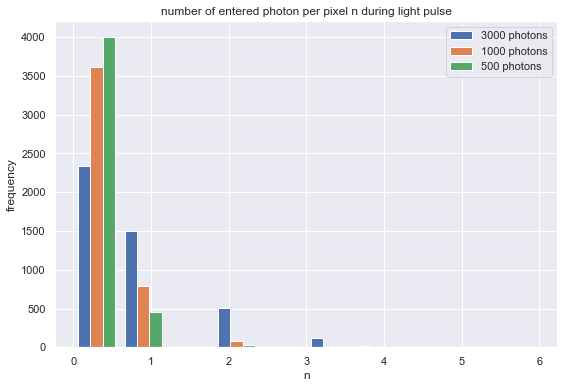

In [6]:
#V_op = 70 #operating voltage
#_char = #characteristic voltage (rosadoさんのcrosstalkの論文から。mppcのモデルがそもそも違う)
#def over_V(t_delay):
    #return V_i*(1-np.exp(-(t_delay/t_rec))) #V, t = delay time from the avalanche triggering


#def PDE(V_shift, t_delay):
   # return int(0.25*(1-np.exp(-(over_V(t_delay)-V_shift)/V_char))) #maximum PDE E= 25% from data booklet

    
#l = number of injected photons / unit time
#t = arbitrary time
#n = numer of carrier generated (random variable)
#data of each pixel generated randomly from poisson distribution with l = 1

data_rv1 = np.zeros((max(n_s)+1)*n_pix).reshape((max(n_s)+1),n_pix)
rd.seed(1)
for i in range(1, len(data_rv1)):
    data_rv1[i] = rd.poisson(n_s[i]/n_pix, size = n_pix) #l (avg # photon per pixel within t_pulse) = 1 
 #n_s[i]/n_pix is approximately 1


plt.subplots(figsize=(9, 6))
a = data_rv1[max(n_s)]
b = data_rv1[max(n_s)-2000]
c = data_rv1[max(n_s)-2500]
plt.hist([a, b,c], label=["3000 photons", "1000 photons", "500 photons"])

plt.legend()
plt.xlabel("n")
plt.ylabel("frequency")
plt.title("number of entered photon per pixel n during light pulse")
plt.savefig("data_photonppix.png")
#plt.show()


(0.12814476844139494, 0.04457014297655768, 0.024910773881748068)

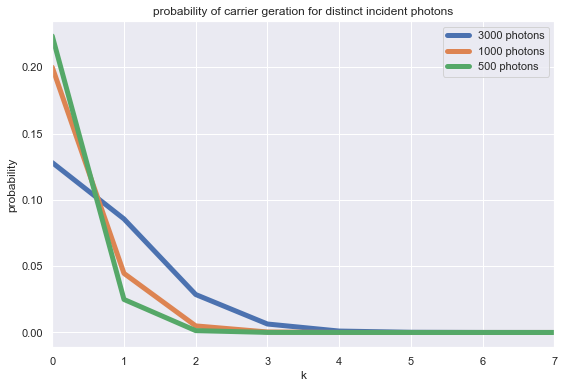

In [7]:
#including PDE
#p_carri = np.zeros((max(n_s)+1)*n_pix).reshape((max(n_s)+1),n_pix)

x1 = np.arange(0, max(n_s)+1)
p_carri_3000 = np.zeros_like(x1)
x2 = np.arange(0, 1001)
p_carri_1000 = np.zeros_like(x2)
x3 = np.arange(0, 501)
p_carri_500 = np.zeros_like(x3)

#for i in range(1, len(data_carri)):

p_carri_3000 = 0.25*poisson.pmf(x1,max(n_s)/n_pix)
p_carri_1000 = 0.25*poisson.pmf(x2,1000/n_pix)
p_carri_500 = 0.25*poisson.pmf(x3,500/n_pix)

    
plt.subplots(figsize=(9, 6))
#b = data_carri[max(n_s)-2000]
#c = data_carri[max(n_s)-2500]
#plt.subplots(figsize=(9, 6))
plt.plot(p_carri_3000, label="3000 photons", lw=5)
plt.plot(p_carri_1000, label="1000 photons", lw=5)
plt.plot(p_carri_500, label="500 photons", lw=5)

plt.xlim(0, 7)

plt.legend()
plt.xlabel("k")
plt.ylabel("probability")
plt.title("probability of carrier geration for distinct incident photons")
plt.savefig("data_carrier.png")

p_carri_3000[0], p_carri_1000[1], p_carri_500[1]

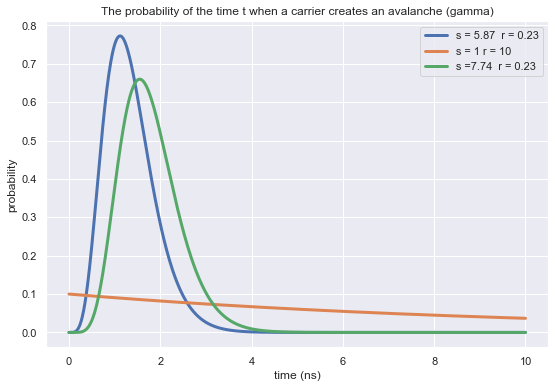

In [250]:
x = np.linspace(0,10,1000) #rec time discreted
t_rec = 10. #ns
#lambda = 
plt.subplots(figsize=(9, 6))
plt.plot(x,gamma.pdf(x, 5.87, scale = 0.23), lw=3, label = "s = 5.87  r = 0.23")
plt.plot(x,gamma.pdf(x,1.,scale=t_rec), lw=3, label = "s = 1 r = 10")
plt.plot(x,gamma.pdf(x,7.74,scale= 0.23), lw=3, label = "s =7.74  r = 0.23")
#plt.plot(x,gamma.pdf(x,0.7,scale=0.7*t_rec), lw=3, label = "s =0.7  r = 7")

#plt.plot(x,gamma.pdf(x,2.*t_rec, scale=1.25, lw=3, label = "scale = 1.25")
#plt.plot(x,gamma.pdf(x,1.9*max(pulse),scale=1.9), lw=3, label = "scale = 3")
#plt.plot(x,gamma.pdf(x,1.4*max(pulse),scale=1.4), lw=3, label = "scale = 1.75")
plt.legend()
plt.xlabel("time (ns)")
plt.ylabel("probability")
plt.title("The probability of the time t when a carrier creates an avalanche (gamma)")
plt.savefig("data_gamma_sample.png")

In [143]:
1./5

0.2

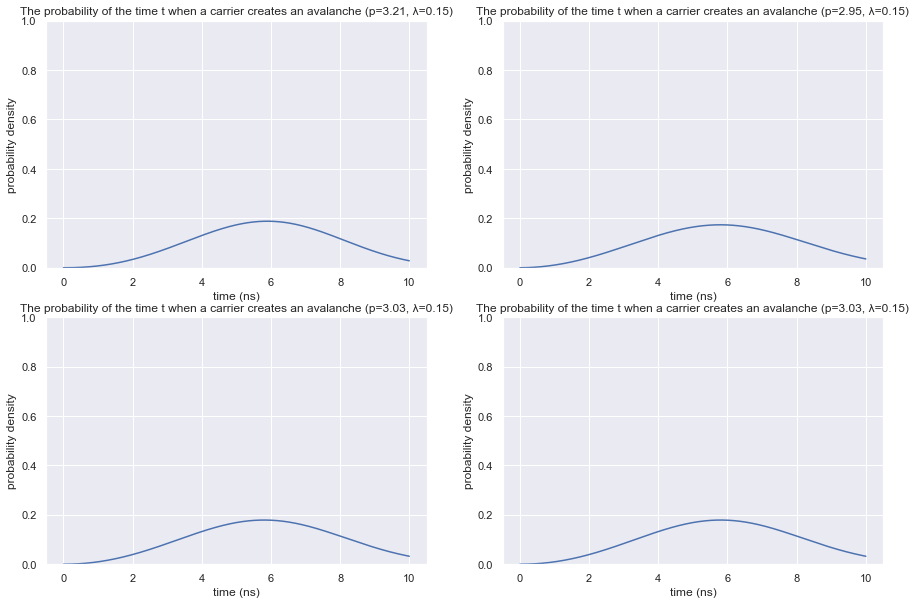

In [430]:

class Weibull():
    def __init__(self):
        pass


    def f(self, x, a, b):
        return (a*b) * ( (x*b)**(a - 1) ) * math.exp(-1 * (x*b)**a )

    def F(self, x, a, b):
            return 1 - math.exp(-1 * (x*b)**a )

    def invF(self, y, a, b):
        return (1/b) * ( -1 * math.log(1 - y) )**(1/a)

    def sampling(self, num, a, b):
        sample=[]
        for i in range(num):
            rand = random.random()
            sample.append(self.invF(rand, a, b))
        return np.array(sample)


    def scatter_pdf(self, ax, data, a, b, alpha=0.4):
        pdf=[]
        for d in data:
            pdf.append(self.f(d, a, b))
        ax.scatter(data, pdf, alpha=alpha)
        ax.set_title("Weibull (alpha={:.2f}, beta={:.2f})".format(a, b))
        ax.set_xlabel("value")
        ax.set_ylabel("probability density")
        ax.set_ylim(0, 1)


    def plot_pdf(self, ax, data, a, b):
        pdf=[]
        for d in data:
            pdf.append(self.f(d, a, b))
        ax.plot(data, pdf)
    
        ax.set_title("The probability of the time t when a carrier creates an avalanche (p={:.2f}, λ={:.2f})".format(a, b))
        ax.set_xlabel("time (ns)")
        ax.set_ylabel("probability density")
        ax.set_ylim(0, 1)

data = np.linspace(0, 10, 10000) #rec

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#if there is 2 carriers and the time when second carrier triggers the avalanche


Weibull().plot_pdf(ax[0, 0], data, 3.21, 0.151)
Weibull().plot_pdf(ax[0, 1], data, 2.951, 0.150)
Weibull().plot_pdf(ax[1, 0], data, 3.028, 0.151)
Weibull().plot_pdf(ax[1, 1], data, 3.028, 0.151)
#Weibull().plot_pdf(ax[2, 0], data, 3, 1)
#Weibull().plot_pdf(ax[2, 1], data, 3, 2)

#plt.title("The probability of time when the avalanche is created")
plt.savefig("mhresult_weibull_pdf.png")

plt.show()

#\lambda p(\lambda t)^{p-1}
#1-exp(-(\lambda t)^p)
#1- exp(\int_{0}^{t} f(u)du) 

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_pdf'

## avalanches 


### probability of primary avalanches created by carriers

In [10]:
#q_i = 
def charge(t_delay):
    return q_i*over_V(t_delay)/V_i

### probability of secondary photons created by primary avalanches 
$$
1- P(PA)
$$

### probability of time a secondary photon is relieased given # of secondary photon is created + overvoltage is 

The main difference between crosstalk and afterpulse is that the position of pixel that the secondary photon hits and its realeased time from deplation region. Here, the pulse due to the secondary photon which hits neighbouring pixel at the time when the generaiton time and the released time (called delay time) is shorter than the time resolution is defined as crosstalk and the pulse due to the secondary photon which hits the primary pixel and the delay time is longer than the time resolution is called afterpulse. In other words, the time resoluion is threshold that distinguish crosstalk and afterpulse. 

### probability of location that secondary photons hit the primary pixel given the photon released after t (AP)

### probabability of location that secandary photons hit the neighbouring pixel given the photon released before t (CT)

### overall

## limitation of Frequentist statistics for conditional probability (mainly CT, AP)
Point estimation like maximum likelihood looks for fixed parameter of the goal distribution. However, the method lacks its accuracy as it is impossible to test out the distribution and corresponding parameter generated by the data and if it follows the population distribution. In the case of this study, the data used to generate is not one obtained by the experiment and also the target distributon is combination of multiple models therefore is high dimension. These factors leads inaccuracy of estimation in parameter such an mean and variance.

- 要約: frequentistでは求めたい分布自体が高次元＋複雑すぎてparameterが定められない。

# Introduction of Baysian statistics

Baysian is one of the most popular and dominant statistical approach in 20th century because the rapid development of Technology allows to compute complecated probability with uncertain parameter and combined different distribution. The basic idea of this statistical method is parameter inference using conditional probability so that it yields the probability distribution for a parameter. This is the main difference from Frequentist statistics which consider an objective parameter as a fixed value. 

## concepts
Assume an observed data B obtained is true (called prior) and in order to estimate a set A which contains parameter of resultant probability distribution and un-obsrevable variables, it is able to calculate conditional probability for A given the data B is true using Bayes' theorem. Advantage of Bayes theorem over the frequentist is that there exists the probability distribution for a parameter which doesn't have to be one exact value. Since there is no data for one pixel state, it would be simple to find parameter corresponding to the distribution of the saturation. 

- 要約: 分布のparameterが頻度推定だとひとつの固定されたparameterの値が必要 + その値が定数でpixelごとのデータがないのに求められないという理由から、parameterがその値になる確率をbayesで求めた方がシンプルかつ正確なのではという推測。また、frequentistでの解と比べることができるのでやってみる価値はある。

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$
- likelihood: P(B|A); suppose a set A is true and generate probability for reproducing the data B. Maximizing this probability 
- prior: P(A); prior knowledge about a set A
- posterior: P(A|B); suppose a data B is true and generate probability for a set A.

 ## Monte Calro Marckov Chain (MCMC)

In general, Monte Calro Marckov chain is a process that repeats sampling from arbitrary probability distribution (in this case from approximate posterior), and the distribution converges to one distribution called "stationary distribution". random variables produced by sampling is dependent of one previous step and independent of the initial condition. Because of the property that random variables following marcov chain with stationary distribution P(x) follows P(x), random variables generated by the marcov chain can be said that sampling from posterior if P(x) is equivalent to posterior. This is useful way to find parameters for posterior distribution P(A|B).

Formal definitions are following;
- sampling:  generate random variables from arbitrary distribution
- Monte Calro method: a method that generates random number for approximation 
- Marcov chain: stochastic process that the next state depends on only current state
    - the goal of MCMC is generating Marcov chain such that its stationary distribution p(x) is which we would like to sample from. 

As transition probability (= probability that determines the next variable) is unknown and it is very complicated to sample from uncertain statiionary distribution, introduce Metropolis haisting (MH) method to obtain the distribution.

## metropolis haisting

\begin{equation}
p(x_t)p(x_{t+1}|x_t) = p(x_{t+1})p(x_{t}|x_{t+1}) \label{g}\tag{5}
\end{equation}

Metropolis haisting (MH) determines the next step using detailed balance condition ($\ref{g}$) with respect to previous value, it plays a role like a transition probability. MCMC simulation has been attempted for Crosstalk, afterpulse and delayed crosstalks, however, there is no MCMC simulation for overall process, especially using Metropolis haisting.

There is another MCMC method called Gibbs Sampling. This method can obtain more random samples as the probability ratio $r$ is always 1 so that all sample generated are accepted while Metroplis method sometimes rejects a sample with $r < 1$. In spite of that, Gibbs sampling demands us to write the conditonal distribution in order to apply it to the detailed balancee condition. The conditional probabilty distribution is very ambiguous in the case of the saturation, metropolis method is the best way to examine <span class="mark">the expected number of photon detected by MPPC.</span>

- 要約: モンテカルロ法マルコフ鎖は初期状態に左右されず、ひとつ前の状態にしか依存しない + 回数を繰り返せば1つの分布に収束するという特性、そして事後分布P(A|B)が定常分布であれば確率変数は事後分布から生成されていると言えるので事後分布の統計を知るのに最適。メトロポリスヘイスティング (MH法)で遷移核を設計し、最終的な分布の期待値を知る。


## distribution of photons

In [11]:
sigma = np.zeros_like(n_s)
rd.seed(1)
for i in range(len(sigma)):
    sigma[i] = np.random.normal(loc=0., scale =1.)
sigma
# sigma can be obtained by experiment I guess

array([ 1,  0,  0, ..., -1, -1,  0])

In [12]:
#discritize time
N = 5000 #number of sampling (目標サンプル数)

#generate gamma distribution with 
x = np.linspace(0,10,1000) #rec time discreted
def model_gamma(s, r):
    return gamma.pdf(x, s, r)

def prior(l,n):
    l = 1.
    return (l**(-n)*np.exp(l))/numpy.math.factorial(n)

    
def likelihood_one(y, m, n, sigma): # y = n_s, m = mean of n_s, n = 
    return 1./(sigma*np.sqrt(2*np.pi)) * (np.exp(y-model_seed(n))**2/(2*sigma**2))

def likelihood(y, m, amplitude, sigma):
    L = 1.
    for i in range(len(y)):
        L*= likelihood_one(y[i],m[i])
    return L


In [13]:
def MH_step(X_t):
    values = np.random.multivariate_normal([x, y], [[10,0,0],[0,10,0]], 1)  # 乱数生成
    x_star = values[0,0]
    y_star = values[0,1]
    
     #use 4 as scale, see if the value converges or not
    #Probability of new variable
    p_X_star = likelihood(n_s, time, X_star, sigma) *prior(X_star) #find X_star = amplitude
    #probability of X_t
    p_X_t = likelihood(, time, X_t, sigma) *prior(X_t)
    alpha = p_X_star/p_X_t #acceptance ratio
    u = np.random.random() #random number from uniform distribution
    if u <= alpha:
        return X_star #accept
    else:
        return X_t #reject

SyntaxError: invalid syntax (<ipython-input-13-f1785a448e24>, line 10)

In [14]:
X_t = 1. #start the value from previous tut
Xs = np.zeros(10000)
#probability distribution for amplitude = posterior
for i in range(len(Xs)):
    X_t = MH_step(X_t)
    Xs[i] = X_t

NameError: name 'MH_step' is not defined

# Discussion/evaluation

# 反省会
- figureはcharge数で比べないと意味がないので直して
- 入射したphotonが複数同じpixelに入った場合のCT+APの確率変動は？
    - overvoltage によってCTの確率は変わる
- DCRとmultiplicationを考えていない
    - DCRは必須, multiplicationは正直どう関係しているのかわかってない
- 今回はinjected photonが最初に複数個入ることはあまりない、影響は大きくないと仮定した上でpoissonのパラメータを勝手に決定
    - parameter: 要検定
- それぞれのerror factor がどれほどsaturationに影響しているか? <span class="burk">(重要)</span>
    - regression 
        - 線形ならcorrelation cofficient
        - 非線形なら共分散行列の推定? (https://www.sas.com/content/dam/SAS/ja_jp/doc/event/sas-user-groups/usergroups13-d-08.pdf)
- エネルギー分解能や時間分解能, transit timeの影響は？<span class="burk">(重要)</span>
- probability of CTの位置依存性: http://ndip.in2p3.fr/ndip14/AGENDA/AGENDA-by-DAY/Presentations/3Wednesday/PM/ID34615_Rosado.pdf

As it is unable to obtain conditional distribution $P(n|N_{seed})$ for probability of number of entered photon per pixel during light pulse $n$, use MH method to estimate the conditional distribution.According to Bayesian theorem,
\begin{equation}
    P(n|N_{seed}) \propto P(N_{seed}|n)P(n)
\end{equation}
where the likelihood function is assumed as normal distribution with mean of $N_seed$ and variance is random variable from $N(0,1)$;
$$
 P(N_{seed}|n) = \frac{1}{\sqrt{2\pi\sigma}}\exp(-\frac{(y-N_{seed})^ 2}{2\sigma^ 2})
$$
prior is probability of n entered photons per pixel during light pulse hence it follows poisson distribution.
$$
 P(n) = \frac{\lambda^{n} e^{-\lambda}}{n!}
$$

$\lambda$ is mean of photons entering 1 pixel during light pulse. Let it $\lambda = 1$, assuming no saturation occurs at this point. Using \ref{sug}, the conditional distribution looks like figure 3. 


Note that carriers are generated with probability of PDE, fixed intrinsic variable of SiPM in this case.


In [406]:
#Metropolis
def gamma_pdf(x, k, q):
    p = 1 - math.exp(-1 * (x*q)**k )
    return p

def genPdfHist(f, xmin, xmax, N):
    x = np.linspace(xmin,xmax, N)
    p = [f(v) for v in x]
    return x,p

def showPdf(f, xmin, xmax, N, yscale=1.0):
    x, p = genPdfHist(f, xmin, xmax, N)
    y = [e*yscale for e in p]
    plt.plot(x,y)
    plt.show()

In [407]:
#generate random variables from gamma distribution (assume this is observartion)
rd.seed(5)
def PlainSampler(pdf, xmin, xmax, N):
    n = 0
    xs = []
    while n < N:
        x = xmin + np.random.rand()*(xmax-xmin)
        p = pdf(x)
        if np.random.rand() < p:
            # accept
            xs.append(x)
            n = n + 1
    return xs

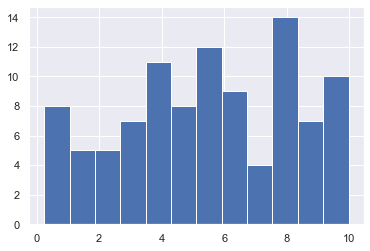

In [408]:
k_true = 5./t_rec
q_true = 2.
gp1 = lambda x : gamma_pdf(x, k_true, q_true)
#gp1 = gamma_pdf(x, k_true, q_true)

smp1 = PlainSampler(gp1, 0, 10, 100)
h1 = plt.hist(smp1, bins = 12)
#showPdf(gp1, 0, 50, 100, h1[0].sum()/(h1[1][1]-h1[1][0]))
plt.show()

In [409]:
rd.seed(1)
def pdf_gamma_sample(x, sample):
    k = x[0]
    q = x[1]
    # Pが小さく成りすぎるのを防ぐ
    sample1 = np.random.choice(sample, 50)
    p = [gamma.pdf(s, k, q) for s in sample1]
    return np.prod(p)

In [410]:
#prior
rd.seed(1)
def prior(cdim, xdim, xmax):
    x = np.random.rand(cdim, xdim)*xmax
    return x

In [411]:
rd.seed(1)
def MHmap(pdf, x, xdim, sig):
    # Gibbs サンプリング（１変数のみ変更）
    xnew = x + np.eye(1, xdim, np.random.randint(xdim))[0,:] * np.random.normal(loc=0, scale=sig)
    # ｘの値域を限定する
    xnew = np.maximum(xnew, 0.01)
    # Metropolis 基準で選択
    r = np.random.rand()
    if r < pdf(xnew)/pdf(x):
        x = xnew
    return x



In [412]:
def MCMC_gamma_01(sample, x0, sig, N):
    #
    pdf1 = lambda x: pdf_gamma_sample(x, sample)
    #
    x = x0
    xs = []
    for i in range(N):
        # Metropolis基準に従って点群を写像
        x = [MHmap(pdf1, e, 2, sig) for e in x]
        # ランダムに再サンプリング
        s = np.random.randint(0,len(x),(len(x)))
        x = [x[j] for j in s]
        #
        xs.append(x)
    return np.array(xs)   

In [413]:
p0 = prior(50, 2, 12)
sig = 2
xs = MCMC_gamma_01(smp1, p0, sig, 12)

<ipython-input-411-ada52d0acea3>:9: RuntimeWarning: invalid value encountered in double_scalars
  if r < pdf(xnew)/pdf(x):
<ipython-input-411-ada52d0acea3>:9: RuntimeWarning: divide by zero encountered in double_scalars
  if r < pdf(xnew)/pdf(x):


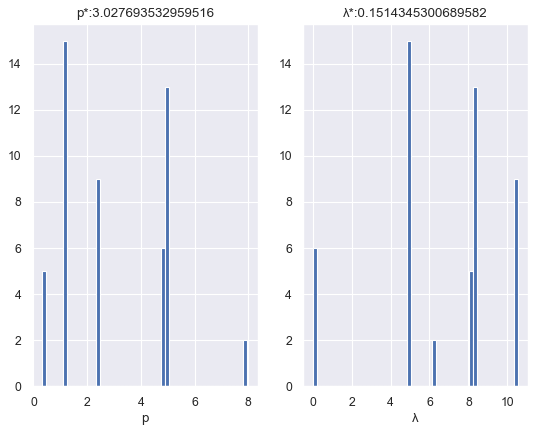

In [414]:
fig = plt.figure(figsize=(8, 6), dpi=80)
#fig.subplots(figsize=(10, 10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(xs[-1,:,0], bins=50)
ax2.hist(xs[-1,:,1], bins=50)
ax1.set_xlabel("p")
ax2.set_xlabel("λ")
k_est = xs[-1,:,0].mean()
q_est = 1/(xs[-1,:,1].mean())
ax1.set_title("p*:{}".format(k_est))
ax2.set_title("λ*:{}".format(q_est))
#plt.title("metropolis hasting for gamma distribution")
plt.show()
fig.savefig("sample_wei_3.png")

In [418]:
from IPython.display import Image
print(Image("sample_wei_1.png"), Image("sample_wei_2.png"))
#Image("sample_wei_3.png")
#Image("sample_wei_4.png")

<IPython.core.display.Image object> <IPython.core.display.Image object>
